# new data


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from random import seed
from random import randint

In [ ]:
new_input_path = '/content/drive/MyDrive/Colab Notebooks/Data modification/code/update data/data_v3.csv'
new_df = pd.read_csv(new_input_path)
new_df.head()

,Unnamed: 0,full_name,age_gorup,age,gender,profession_group,religion,hometown,update_home_town,district,...,comments,is_addicted,marital_status,economic_condition,fix_economic_condition,area,family_member,have_children,mental_issue,educational_status
0,0,Parvez,teen,22,male,worker,muslim,brahmanbaria,brahmanbaria,Brahmanbaria,...,NaN,No,NaN,Lower-Middle Class,lower class,Rural,0,0,No,NaN
1,1,Alhaj Uddin,teen,20,male,NaN,muslim,sylhet,sylhet,Sylhet,...,NaN,No,Single,Middle Class,middle class,Rural,2,0,No,NaN
2,2,Priti Akter,teen,14,female,student,muslim,manikganj,manikganj,Manikganj,...,NaN,No,Single,Middle Class,middle class,Rural,4,0,No,Class 9
3,3,Acchia Akhter,NaN,NaN,female,student,muslim,bogra,bogra,Bogura,...,NaN,No,Single,Middle Class,middle class,Urban,4,0,No,Honor's
4,4,Dilshad Nahar,teen,18,female,student,muslim,dhaka,dhaka,Dhaka,...,NaN,No,Single,Upper Middle Class,upper middle class,Urban,4,0,No,College


## comparison data


### reason vs age

In [ ]:
df = new_df

reason_group = df.groupby(['fix_reason']).size().reset_index(name='count')
the_reason_list = reason_group['fix_reason'][:].tolist()

the_column = "fix_reason"
list_value = the_reason_list.copy()

age_group = df.groupby(['age_gorup']).size().reset_index(name='count')
the_vs_list = ['teen', 'youth', 'middle-aged', 'adult', 'old']

the_list = []
l = the_vs_list.copy()
l.insert(0, 'reason')
the_list.append(l)
size = len(the_vs_list)+1
for the_value in list_value:
    ## age_gorup ---------------------------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['age_gorup']).size().reset_index(name='count')
    the_group = age_group
    # print(the_group)

    # fix age group
    # the_list = ['Teen', 'Youth', 'Middle-aged', 'Adult', 'Old']
    the_map = {}
    for i in range(0, len(the_group)):
        if the_group['age_gorup'][i] == 'teen':
            the_map['teen'] = 0
        
        if the_group['age_gorup'][i] in ['yougth' ,'youth']:
            the_map['youth'] = 0
        
        if the_group['age_gorup'][i] in ['middle-aged' ,'middled-aged']:
            the_map['middle-aged'] = 0
        
        if the_group['age_gorup'][i] == 'adult':
            the_map['adult'] = 0
        
        if the_group['age_gorup'][i] in ['.' ,'old']:
            the_map['old'] = 0

    for i in range(0, len(the_group)):
        if the_group['age_gorup'][i] == 'teen':
            the_map['teen'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['yougth' ,'youth']:
            the_map['youth'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['middle-aged' ,'middled-aged']:
            the_map['middle-aged'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] == 'adult':
            the_map['adult'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['.' ,'old']:
            the_map['old'] += the_group['count'][i]

    reason_list = list(the_map.keys())
    the_count_list = list(the_map.values())

    l = [0]*size
    l[0] = the_value

    for i in range(0, len(reason_list)):
        the_reason = reason_list[i]
        the_index = the_vs_list.index(the_reason)+1
        l[the_index]  =  the_count_list[i]
    the_list.append(l)


print(the_list)

[['reason', 'teen', 'youth', 'middle-aged', 'adult', 'old'], ['addiction', 2, 2, 2, 0, 0], ['domestic violence', 36, 16, 13, 7, 4], ['fails', 34, 7, 5, 6, 1], ['false accusation', 13, 0, 2, 1, 0], ['family issue', 156, 37, 26, 16, 9], ['mental & physical issue', 30, 8, 8, 20, 8], ['proverty', 4, 4, 0, 4, 0]]


### reason vs gender

In [ ]:
df = new_df

reason_group = df.groupby(['fix_reason']).size().reset_index(name='count')
the_reason_list = reason_group['fix_reason'][:].tolist()

the_column = "fix_reason"
list_value = the_reason_list.copy()

age_group = df.groupby(['gender']).size().reset_index(name='count')
the_vs_list = age_group['gender'][:].tolist()

the_list = []
l = the_vs_list.copy()
l.insert(0, 'reason')
the_list.append(l)
size = len(the_vs_list)+1
for the_value in list_value:
    ## gender -------------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['gender']).size().reset_index(name='count')
    the_group = age_group

    l = [0]*size
    l[0] = the_value

    for i in range(0, len(the_group)):
        the_reason = the_group['gender'][i]
        the_index = the_vs_list.index(the_reason)+1
        l[the_index]  =  the_group['count'][i]
    the_list.append(l)


print(the_list)

[['reason', '3rd gender', 'female', 'male'], ['addiction', 0, 0, 6], ['domestic violence', 0, 63, 29], ['fails', 0, 35, 35], ['false accusation', 0, 8, 11], ['family issue', 0, 166, 115], ['mental & physical issue', 0, 35, 47], ['proverty', 0, 6, 9]]


### method vs gender

In [ ]:
reason_group = df.groupby(['fix_method']).size().reset_index(name='count')
print(reason_group)

         fix_method  count
0      Jumping over     12
1      cutting neck      6
2    electric shock      1
3    firing himself      6
4           hanging    546
5            poison    133
6     railway track     12
7  taking injection      1
8      taking pills     18


In [ ]:
df = new_df

reason_group = df.groupby(['fix_method']).size().reset_index(name='count')
the_reason_list = reason_group['fix_method'][:].tolist()

the_column = "fix_method"
list_value = the_reason_list.copy()

age_group = df.groupby(['gender']).size().reset_index(name='count')
the_vs_list = age_group['gender'][:].tolist()

the_list = []
l = the_vs_list.copy()
l.insert(0, 'reason')
the_list.append(l)
size = len(the_vs_list)+1
for the_value in list_value:
    ## gender -------------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['gender']).size().reset_index(name='count')
    the_group = age_group

    l = [0]*size
    l[0] = the_value

    for i in range(0, len(the_group)):
        the_reason = the_group['gender'][i]
        the_index = the_vs_list.index(the_reason)+1
        l[the_index]  =  the_group['count'][i]
    the_list.append(l)


print(the_list)

[['reason', '3rd gender', 'female', 'male'], ['Jumping over', 0, 1, 11], ['cutting neck', 0, 1, 5], ['electric shock', 0, 0, 1], ['firing himself', 0, 3, 3], ['hanging', 1, 314, 231], ['poison', 0, 69, 64], ['railway track', 0, 3, 9], ['taking injection', 0, 1, 0], ['taking pills', 0, 10, 8]]


### ecomonic_conditon vs agegroup

In [ ]:
# fix economic data
l = []
the_list = ['upper class', 'upper middle class', 'middle class', 'lower middle class', 'lower class']

size = len(df)
for i in range(0, size):
    if df['economic_condition'][i] in ['Upper Class', 'upper class']:
        l.append('upper class')
    elif df['economic_condition'][i] in ['Upper Middle Class', 'Upper middle class', 'upper middle class']:
        l.append('upper middle class')
    elif df['economic_condition'][i] in ['middle class', 'middle  class',' Middle class', 'Middle Class', 'MIddle class']:
        l.append('middle class')
    elif df['economic_condition'][i] == 'lower middle class':
        l.append('lower middle class')
    elif df['economic_condition'][i] in ['lower class', 'Lower-Middle Class', 'Lower middle class', 'Lower Middle Class']:
        l.append('lower class')
    else:
        l.append(np.nan)

print(len(l))
print(l)

dic = {'fix_economic_condition':l}
frame = pd.DataFrame.from_dict(dic)   
frame.to_csv('file1.csv')

759
['lower class', 'middle class', 'middle class', 'middle class', 'upper middle class', 'lower class', 'middle class', 'lower class', 'middle class', 'middle class', 'lower class', 'upper middle class', 'upper middle class', 'upper middle class', 'middle class', 'lower class', 'lower class', 'middle class', 'middle class', 'middle class', 'upper middle class', 'middle class', 'middle class', 'middle class', 'middle class', 'middle class', 'upper middle class', 'middle class', 'upper class', 'middle class', 'middle class', 'middle class', 'middle class', 'upper middle class', 'middle class', 'upper class', 'lower class', 'lower class', 'middle class', 'upper middle class', 'middle class', 'upper middle class', 'upper middle class', 'lower class', 'upper middle class', 'lower class', 'middle class', 'middle class', 'middle class', 'lower middle class', 'lower class', 'lower middle class', 'middle class', 'upper middle class', 'middle class', 'lower middle class', 'middle class', 'upper

In [ ]:
df = new_df

the_reason_list = ['upper class', 'upper middle class', 'middle class', 'lower middle class', 'lower class']

the_column = "fix_economic_condition"
list_value = the_reason_list.copy()

age_group = df.groupby(['age_gorup']).size().reset_index(name='count')
the_vs_list = ['teen', 'youth', 'middle-aged', 'adult', 'old']

the_list = []
l = the_vs_list.copy()
l.insert(0, 'reason')
the_list.append(l)
size = len(the_vs_list)+1
for the_value in list_value:
    ## age_gorup ---------------------------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['age_gorup']).size().reset_index(name='count')
    the_group = age_group
    # print(the_group)

    # fix age group
    # the_list = ['Teen', 'Youth', 'Middle-aged', 'Adult', 'Old']
    the_map = {}
    for i in range(0, len(the_group)):
        if the_group['age_gorup'][i] == 'teen':
            the_map['teen'] = 0
        
        if the_group['age_gorup'][i] in ['yougth' ,'youth']:
            the_map['youth'] = 0
        
        if the_group['age_gorup'][i] in ['middle-aged' ,'middled-aged']:
            the_map['middle-aged'] = 0
        
        if the_group['age_gorup'][i] == 'adult':
            the_map['adult'] = 0
        
        if the_group['age_gorup'][i] in ['.' ,'old']:
            the_map['old'] = 0

    for i in range(0, len(the_group)):
        if the_group['age_gorup'][i] == 'teen':
            the_map['teen'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['yougth' ,'youth']:
            the_map['youth'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['middle-aged' ,'middled-aged']:
            the_map['middle-aged'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] == 'adult':
            the_map['adult'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['.' ,'old']:
            the_map['old'] += the_group['count'][i]

    reason_list = list(the_map.keys())
    the_count_list = list(the_map.values())

    l = [0]*size
    l[0] = the_value

    for i in range(0, len(reason_list)):
        the_reason = reason_list[i]
        the_index = the_vs_list.index(the_reason)+1
        l[the_index]  =  the_count_list[i]
    the_list.append(l)


print(the_list)

[['reason', 'teen', 'youth', 'middle-aged', 'adult', 'old'], ['upper class', 9, 3, 4, 0, 0], ['upper middle class', 33, 5, 3, 4, 4], ['middle class', 156, 40, 30, 25, 7], ['lower middle class', 86, 26, 19, 19, 12], ['lower class', 19, 4, 4, 2, 1]]


## cluster

In [ ]:
reason_group = new_df.groupby(['fix_reason']).size().reset_index(name='count')
df =  new_df

the_list = []

## add reason
for i in range(0, len(reason_group)):
    l = ["reason"]
    the_reason = reason_group['fix_reason'][i]
    l.append(the_reason)
    l.append(reason_group['count'][i])
    the_list.append(l)

the_column = "fix_reason"
list_value = ['addiction', 'domestic violence', 'fails', 'false accusation', 'family issue', 'mental & physical issue', 'proverty']
for the_value in list_value:
    ## age_gorup ---------------------------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['age_gorup']).size().reset_index(name='count')
    the_group = age_group
    # print(the_group)

    # fix age group
    # the_list = ['Teen', 'Youth', 'Middle-aged', 'Adult', 'Old']
    the_map = {}
    for i in range(0, len(the_group)):
        if the_group['age_gorup'][i] == 'teen':
            the_map['Teen'] = 0
        
        if the_group['age_gorup'][i] in ['yougth' ,'youth']:
            the_map['Youth'] = 0
        
        if the_group['age_gorup'][i] in ['middle-aged' ,'middled-aged']:
            the_map['Middle-aged'] = 0
        
        if the_group['age_gorup'][i] == 'adult':
            the_map['Adult'] = 0
        
        if the_group['age_gorup'][i] in ['.' ,'old']:
            the_map['Old'] = 0

    for i in range(0, len(the_group)):
        if the_group['age_gorup'][i] == 'teen':
            the_map['Teen'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['yougth' ,'youth']:
            the_map['Youth'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['middle-aged' ,'middled-aged']:
            the_map['Middle-aged'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] == 'adult':
            the_map['Adult'] += the_group['count'][i]
        
        if the_group['age_gorup'][i] in ['.' ,'old']:
            the_map['Old'] += the_group['count'][i]

    reason_list = list(the_map.keys())
    the_count_list = list(the_map.values())

    for i in range(0, len(reason_list)):
        l = [the_value]
        the_reason = reason_list[i]
        l.append(the_reason)
        l.append(the_count_list[i])
        the_list.append(l)

    ## gender -------------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['gender']).size().reset_index(name='count')
    the_group = age_group
    for i in range(0, len(the_group)):
        l = [the_value]
        the_reason = the_group['gender'][i]
        the_count = the_group['count'][i]
        l.append(the_reason)
        l.append(the_count)
        the_list.append(l)

    ## weather_main-------------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['weather_main']).size().reset_index(name='count')
    the_group = age_group
    for i in range(0, len(the_group)):
        l = [the_value]
        the_reason = the_group['weather_main'][i]
        the_count = the_group['count'][i]
        l.append(the_reason)
        l.append(the_count)
        the_list.append(l)
    

    ## profession_group----------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['profession_group']).size().reset_index(name='count')
    area_profession_group = age_group

    profession_group = {}
    for i in range(0, len(area_profession_group)):
        if area_profession_group['profession_group'][i] in ['actor', 'musician', 'saint']:
            profession_group['actor'] = 0

        if area_profession_group['profession_group'][i] == 'businessman':
            profession_group['businessman'] = 0
        
        if area_profession_group['profession_group'][i] in ['day laborer', 'day labourer', 'day-laborer', 'worker']:
            profession_group['day labourer'] = 0
        
        if area_profession_group['profession_group'][i] == 'farmer':
            profession_group['farmer'] = 0

        if area_profession_group['profession_group'][i] in ['housewife', 'houswife']:
            profession_group['housewife'] = 0

        if area_profession_group['profession_group'][i] in ['doctor', 'engineer', 'gambler', 'service holder']:
            profession_group['service holder'] = 0
        
        if area_profession_group['profession_group'][i] in ['spotsman', 'stportsman']:
            profession_group['athlete'] = 0
        
        if area_profession_group['profession_group'][i] == 'student':
            profession_group['student'] = 0
        
        if area_profession_group['profession_group'][i] == 'teacher':
            profession_group['teacher'] = 0
        

    for i in range(0, len(area_profession_group)):
        if area_profession_group['profession_group'][i] in ['actor', 'musician', 'saint']:
            profession_group['actor'] += area_profession_group['count'][i]

        if area_profession_group['profession_group'][i] == 'businessman':
            profession_group['businessman'] += area_profession_group['count'][i]
        
        if area_profession_group['profession_group'][i] in ['day laborer', 'day labourer', 'day-laborer', 'worker']:
            profession_group['day labourer'] += area_profession_group['count'][i]
        
        if area_profession_group['profession_group'][i] == 'farmer':
            profession_group['farmer'] += area_profession_group['count'][i]

        if area_profession_group['profession_group'][i] in ['housewife', 'houswife']:
            profession_group['housewife'] += area_profession_group['count'][i]

        if area_profession_group['profession_group'][i] in ['doctor', 'engineer', 'gambler', 'service holder']:
            profession_group['service holder'] += area_profession_group['count'][i]
        
        if area_profession_group['profession_group'][i] in ['spotsman', 'stportsman']:
            profession_group['athlete'] += area_profession_group['count'][i]
        
        if area_profession_group['profession_group'][i] == 'student':
            profession_group['student'] += area_profession_group['count'][i]
        
        if area_profession_group['profession_group'][i] == 'teacher':
            profession_group['teacher'] += area_profession_group['count'][i]
        
    reason_list = list(profession_group.keys())
    the_count_list = list(profession_group.values())

    for i in range(0, len(reason_list)):
        l = [the_value]
        the_reason = reason_list[i]
        l.append(the_reason)
        l.append(the_count_list[i])
        the_list.append(l)

    
    ## economic_condition ---------------------------------------------------------------------------
    the_frame = df.query(f'{the_column} == "{the_value}"')
    age_group = the_frame.groupby(['economic_condition']).size().reset_index(name='count')
    the_group = age_group
    # print(the_group)

    # fix  group
    # the_list = ['upper class', 'upper middle class', 'middle class', 'lower middle class', 'lower class']
    the_map = {}
    for i in range(0, len(the_group)):
        if the_group['economic_condition'][i] in ['Upper Class', 'upper class']:
            the_map['upper class'] = 0
        
        if the_group['economic_condition'][i] in ['Upper Middle Class', 'Upper middle class', 'upper middle class']:
            the_map['upper middle class'] = 0
        
        if the_group['economic_condition'][i] in ['middle class', 'middle  class',' Middle class', 'Middle Class', 'MIddle class']:
            the_map['middle class'] = 0
        
        if the_group['economic_condition'][i] == 'lower middle class':
            the_map['lower middle class'] = 0
        
        if the_group['economic_condition'][i] in ['lower class', 'Lower-Middle Class', 'Lower middle class', 'Lower Middle Class']:
            the_map['lower class'] = 0
        

    for i in range(0, len(the_group)):
        if the_group['economic_condition'][i] in ['Upper Class', 'upper class']:
            the_map['upper class'] += the_group['count'][i]
        
        if the_group['economic_condition'][i] in ['Upper Middle Class', 'Upper middle class', 'upper middle class']:
            the_map['upper middle class'] += the_group['count'][i]
        
        if the_group['economic_condition'][i] in ['middle class', 'middle  class',' Middle class', 'Middle Class', 'MIddle class']:
            the_map['middle class'] += the_group['count'][i]
        
        if the_group['economic_condition'][i] == 'lower middle class':
            the_map['lower middle class'] += the_group['count'][i]
        
        if the_group['economic_condition'][i] in ['lower class', 'Lower-Middle Class', 'Lower middle class', 'Lower Middle Class']:
            the_map['lower class'] += the_group['count'][i]
        

    reason_list = list(the_map.keys())
    the_count_list = list(the_map.values())

    for i in range(0, len(reason_list)):
        l = [the_value]
        the_reason = reason_list[i]
        l.append(the_reason)
        l.append(the_count_list[i])
        the_list.append(l)


print(the_list)

[['reason', 'addiction', 6], ['reason', 'domestic violence', 92], ['reason', 'fails', 70], ['reason', 'false accusation', 19], ['reason', 'family issue', 281], ['reason', 'mental & physical issue', 82], ['reason', 'proverty', 15], ['addiction', 'Middle-aged', 2], ['addiction', 'Teen', 2], ['addiction', 'Youth', 2], ['addiction', 'male', 6], ['addiction', 'Clouds', 1], ['addiction', 'Haze', 2], ['addiction', 'Rain', 3], ['addiction', 'day labourer', 2], ['addiction', 'lower middle class', 3], ['addiction', 'middle class', 1], ['domestic violence', 'Adult', 7], ['domestic violence', 'Middle-aged', 13], ['domestic violence', 'Old', 4], ['domestic violence', 'Teen', 36], ['domestic violence', 'Youth', 16], ['domestic violence', 'female', 63], ['domestic violence', 'male', 29], ['domestic violence', 'Clear', 6], ['domestic violence', 'Clouds', 38], ['domestic violence', 'Drizzle', 1], ['domestic violence', 'Haze', 16], ['domestic violence', 'Mist', 1], ['domestic violence', 'Rain', 30], ['d

In [ ]:
for x in the_list:
    print(x)

['reason', 'addiction', 6]
['reason', 'domestic violence', 92]
['reason', 'fails', 70]
['reason', 'false accusation', 19]
['reason', 'family issue', 281]
['reason', 'mental & physical issue', 82]
['reason', 'proverty', 15]
['addiction', 'Middle-aged', 2]
['addiction', 'Teen', 2]
['addiction', 'Youth', 2]
['addiction', 'male', 6]
['addiction', 'Clouds', 1]
['addiction', 'Haze', 2]
['addiction', 'Rain', 3]
['addiction', 'day labourer', 2]
['addiction', 'lower middle class', 3]
['addiction', 'middle class', 1]
['domestic violence', 'Adult', 7]
['domestic violence', 'Middle-aged', 13]
['domestic violence', 'Old', 4]
['domestic violence', 'Teen', 36]
['domestic violence', 'Youth', 16]
['domestic violence', 'female', 63]
['domestic violence', 'male', 29]
['domestic violence', 'Clear', 6]
['domestic violence', 'Clouds', 38]
['domestic violence', 'Drizzle', 1]
['domestic violence', 'Haze', 16]
['domestic violence', 'Mist', 1]
['domestic violence', 'Rain', 30]
['domestic violence', 'businessman

## Group data and ploting


### area categories

In [ ]:
area_gorup = new_df.groupby(['area']).size().reset_index(name='count')
print(area_gorup)

    area  count
0  Rural     22
1  Urban     72
2  rural    344
3  urban    167


### educational_status

In [ ]:
educational_status_gorup = new_df.groupby(['educational_status']).size().reset_index(name='count')
print(educational_status_gorup)

                  educational_status  count
0        4th year student of medical      1
1                           Class  2      1
2                            Class 1      1
3                           Class 10     11
4                            Class 2      4
..                               ...    ...
57                    school student      1
58                               ssc      1
59  student of chittagang university      1
60                     undergraduate      1
61                        uneducated     28

[62 rows x 2 columns]


### mental_issue



In [ ]:
mental_issue_gorup = new_df.groupby(['mental_issue']).size().reset_index(name='count')
print(mental_issue_gorup)

      mental_issue  count
0       Depression      1
1  Mental disorder      1
2               No     59
3              Yes     16
4       depression      2
5  mental disorder      8
6                n      1
7               no    210
8              yes      7


### family_member

In [ ]:
family_membergorup = new_df.groupby(['family_member']).size().reset_index(name='count')
print(family_membergorup)

   family_member  count
0              0     37
1              1    115
2             14      1
3              2    109
4          2,2,1      2
5              3    117
6              4    138
7              5     57
8              6     17
9              7      6
10             8      1
11   more than 1      1


### economic_condition

In [ ]:
economic_gorup = new_df.groupby(['economic_condition']).size().reset_index(name='count')
print(economic_gorup)

    economic_condition  count
0   Lower Middle Class      8
1   Lower middle class      1
2   Lower-Middle Class      2
3         MIddle class      3
4         Middle Class     74
5         Middle class      3
6          Upper Class     12
7   Upper Middle Class     17
8   Upper middle class      2
9          lower class     21
10  lower middle class    182
11       middle  class      1
12        middle class    222
13         upper class      8
14  upper middle class     49


In [ ]:
# fix data
the_list = ['upper class', 'upper middle class', 'middle class', 'lower middle class', 'lower class']
the_count = [0]*len(the_list)

size = len(economic_gorup)
for i in range(0, size):
    if economic_gorup['economic_condition'][i] in ['Upper Class', 'upper class']:
        the_count[0] += economic_gorup['count'][i]
    
    if economic_gorup['economic_condition'][i] in ['Upper Middle Class', 'Upper middle class', 'upper middle class']:
        the_count[1] += economic_gorup['count'][i]
    
    if economic_gorup['economic_condition'][i] in ['middle class', 'middle  class',' Middle class', 'Middle Class', 'MIddle class']:
        the_count[2] += economic_gorup['count'][i]
    
    if economic_gorup['economic_condition'][i] == 'lower middle class':
        the_count[3] += economic_gorup['count'][i]
    
    if economic_gorup['economic_condition'][i] in ['lower class', 'Lower-Middle Class', 'Lower middle class', 'Lower Middle Class']:
        the_count[4] += economic_gorup['count'][i]
    
print(the_list)
print(the_count)

['upper class', 'upper middle class', 'middle class', 'lower middle class', 'lower class']
[20, 68, 300, 182, 32]


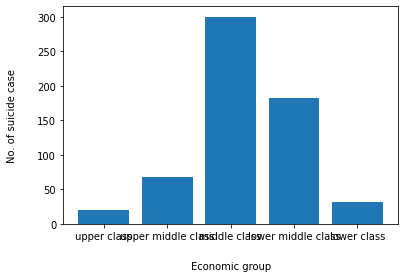

In [ ]:
plt.bar(the_list, the_count)
plt.xlabel("Economic group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()

### is_addicted

In [ ]:
is_addicted_gorup = new_df.groupby(['is_addicted']).size().reset_index(name='count')
print(is_addicted_gorup)

  is_addicted  count
0          NO      7
1          No    202
2         YES      1
3         Yes      4
4          ni      1
5          no    394
6         yes      4


In [ ]:
# fix data
the_list = ['yes', 'no']
the_count = [0, 0]

size = len(is_addicted_gorup)
for i in range(0, size):
    if is_addicted_gorup['is_addicted'][i] in ['YES', 'Yes', 'yes']:
        the_count[0] += is_addicted_gorup['count'][i]
    else:
        the_count[1] += is_addicted_gorup['count'][i]

print(the_list)
print(the_count)

['yes', 'no']
[9, 604]


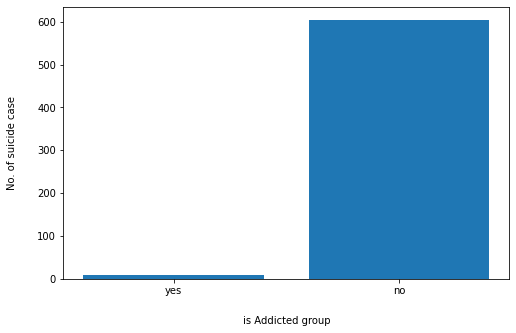

In [ ]:
plt.bar(the_list, the_count)
plt.xlabel("is Addicted group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()

### weather_description

In [ ]:
# weather_description
area_weather_des_gorup = new_df.groupby(['weather_description']).size().reset_index(name='count')
print(area_weather_des_gorup)

             weather_description  count
0                  broken clouds     81
1                      clear sky     90
2                        drizzle      8
3                     few clouds     20
4                           haze    149
5           heavy intensity rain      6
6                     light rain    108
7                           mist      9
8                  moderate rain     94
9                overcast clouds    136
10              scattered clouds     52
11                  thunderstorm      1
12  thunderstorm with light rain      1
13        thunderstorm with rain      4


### weather main group


In [ ]:
# weather_main
area_weather_gorup = new_df.groupby(['weather_main']).size().reset_index(name='count')
print(area_weather_gorup)

   weather_main  count
0         Clear     89
1        Clouds    289
2       Drizzle      8
3          Haze    149
4          Mist      9
5          Rain    209
6  Thunderstorm      6


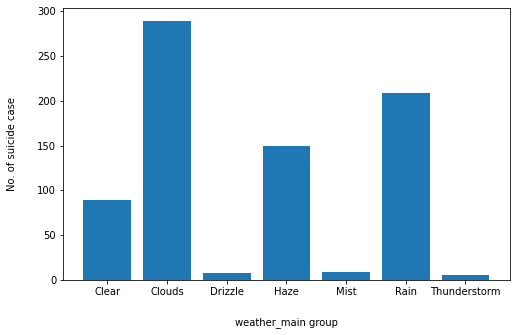

In [ ]:
plt.bar(area_weather_gorup['weather_main'][:], area_weather_gorup['count'][:])
plt.xlabel("weather_main group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()

### Age group

In [ ]:
area_age_gorup = new_df.groupby(['age_gorup']).size().reset_index(name='count')
print(area_age_gorup)

     age_gorup  count
0        adult     71
1  middle-aged     72
2          old     29
3         teen    375
4        youth    103


In [ ]:
# fix age group
the_list = ['Teen', 'Youth', 'Middle-aged', 'Adult', 'Old']
the_count = [0]*len(the_list)

size = len(area_age_gorup)
for i in range(0, size):
    if area_age_gorup['age_gorup'][i] == 'teen':
        the_count[0] += area_age_gorup['count'][i]
    
    if area_age_gorup['age_gorup'][i] in ['yougth' ,'youth']:
        the_count[1] += area_age_gorup['count'][i]
    
    if area_age_gorup['age_gorup'][i] in ['middle-aged' ,'middled-aged']:
        the_count[2] += area_age_gorup['count'][i]
    
    if area_age_gorup['age_gorup'][i] == 'adult':
        the_count[3] += area_age_gorup['count'][i]
    
    if area_age_gorup['age_gorup'][i] in ['.' ,'old']:
        the_count[4] += area_age_gorup['count'][i]
    
print(the_list)
print(the_count)

['Teen', 'Youth', 'Middle-aged', 'Adult', 'Old']
[375, 103, 72, 71, 29]


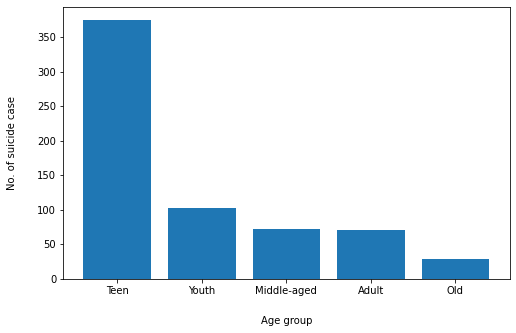

In [ ]:
plt.bar(the_list, the_count)
plt.xlabel("Age group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()

### gender group

In [ ]:
area_gender = new_df.groupby(['gender']).size().reset_index(name='count')
print(area_gender)

       gender  count
0  3rd gender      1
1      female    417
2        male    341


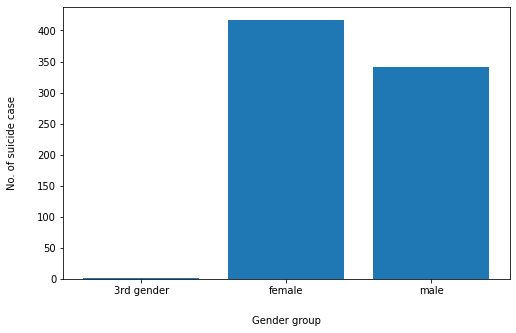

In [ ]:
plt.bar(area_gender['gender'][:], area_gender['count'][:])
plt.xlabel("Gender group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()

### Time group

In [ ]:
area_time = new_df.groupby(['time']).size().reset_index(name='count')
print(area_time)

        time  count
0    Morning      1
1  afternoon     38
2    evening     67
3     moring      1
4    morning    166
5      night    227
6     niight      1
7       noon    113


In [ ]:
# fix time group
the_list = ['morning', 'noon', 'afternoon', 'evening', 'night']
the_count = [0]*len(the_list)

size = len(area_time)
for i in range(0, size):
    if area_time['time'][i] in ['Morning' ,'moring' ,'morning']:
        the_count[0] += area_time['count'][i]
    
    if area_time['time'][i] == 'noon':
        the_count[1] += area_time['count'][i]
    
    if area_time['time'][i] == 'afternoon':
        the_count[2] += area_time['count'][i]
    
    if area_time['time'][i] == 'evening':
        the_count[3] += area_time['count'][i]
    
    if area_time['time'][i] in ['night' ,'niight']:
        the_count[4] += area_time['count'][i]
    
print(the_list)
print(the_count)

['morning', 'noon', 'afternoon', 'evening', 'night']
[168, 113, 38, 67, 228]


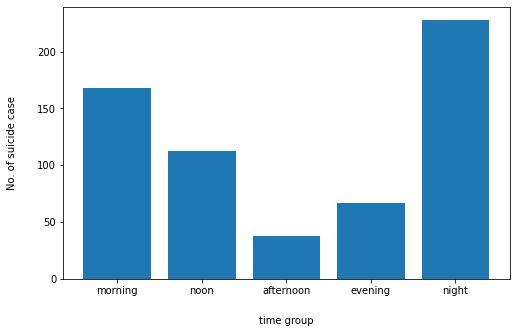

In [ ]:
plt.bar(the_list, the_count)
plt.xlabel("time group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()

### Suicide date

In [ ]:
l = len(new_df)
all_month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December",]
month_list = []
for i in range(0, l):
    the_date = new_df['suicide_date'][i].split("/")
    # print(the_date, len(the_date), "\tid : ", i)
    month_list.append(all_month[int(the_date[1])-1])
# print(month_list)
month_map = {'month':month_list}
month = pd.DataFrame.from_dict(month_map)
month.head()

,month
0,October
1,November
2,September
3,September
4,September


In [ ]:
area_suicide_date = month.groupby(['month']).size().reset_index(name='count')
print(area_suicide_date)

       month  count
0      April     15
1     August    121
2       July    133
3       June    127
4        May     84
5   November     76
6    October     96
7  September    107


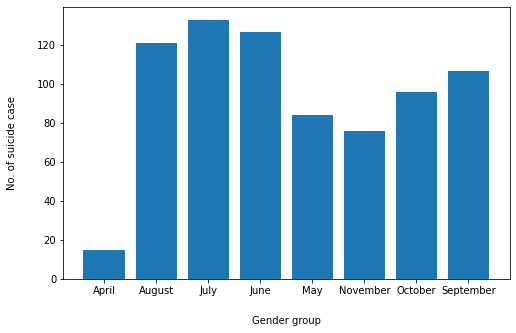

In [ ]:
plt.bar(area_suicide_date['month'][:], area_suicide_date['count'][:])
plt.xlabel("Gender group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()

## newspaper article

In [ ]:
bangla_article = []
english_article = []
l =  len(new_df)
for i in range(0, l):
    the_text = str(new_df['article_writing'][i]).translate({ord(i): None for i in '{}'})
    if the_text is not np.nan and len(the_text)>0:
        # print(the_text)
        # print("------------------------------------------------------------")
        if detect(the_text) == 'en':
            # print(the_text)
            # print("------------------------------------------------------------\n")
            english_article.append(the_text)
        else:
            bangla_article.append(the_text)

print(len(bangla_article))
print(len(english_article))

697
59


## LIWC ON English Article

In [ ]:
!pip install -U liwc

In [ ]:
import re
from collections import Counter

def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

import liwc
dic_path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/update data/LIWC2007_English100131.dic"
parse, category_names = liwc.load_token_parser(dic_path)

In [ ]:
gettysburg = listToString(english_article)
gettysburg_tokens = tokenize(gettysburg)
# now flatmap over all the categories in all of the tokens using a generator:
gettysburg_counts = Counter(category for token in gettysburg_tokens for category in parse(token))
# and print the results:
# print(gettysburg_counts)
for key, value in gettysburg_counts.items():
    print(key+"\t: ", value)

time	:  339
relativ	:  1177
social	:  1094
humans	:  107
funct	:  3466
pronoun	:  604
ppron	:  470
shehe	:  391
death	:  265
preps	:  1380
space	:  653
article	:  647
verb	:  807
auxverb	:  392
present	:  155
past	:  579
cogmech	:  775
insight	:  147
conj	:  286
home	:  150
work	:  308
achieve	:  88
incl	:  317
affect	:  188
negemo	:  143
anx	:  15
quant	:  66
tentat	:  50
money	:  64
posemo	:  45
cause	:  45
anger	:  87
bio	:  198
health	:  84
adverb	:  90
inhib	:  18
motion	:  164
percept	:  173
hear	:  150
certain	:  105
future	:  29
sad	:  31
sexual	:  12
leisure	:  110
family	:  213
ipron	:  134
see	:  16
excl	:  63
negate	:  44
ingest	:  7
they	:  51
body	:  98
number	:  57
friend	:  10
i	:  9
discrep	:  30
feel	:  7
we	:  18
relig	:  2
swear	:  1
you	:  1


In [ ]:
total = sum(gettysburg_counts.values())
# print(total)
for key, value in gettysburg_counts.items():
    print(key+"\t: ", round((value/total) *100, 6), "%")

time	:  1.96807 %
relativ	:  6.833091 %
social	:  6.351234 %
humans	:  0.62119 %
funct	:  20.121916 %
pronoun	:  3.506531 %
ppron	:  2.728592 %
shehe	:  2.269956 %
death	:  1.538462 %
preps	:  8.011611 %
space	:  3.791001 %
article	:  3.756168 %
verb	:  4.685051 %
auxverb	:  2.275762 %
present	:  0.899855 %
past	:  3.361393 %
cogmech	:  4.499274 %
insight	:  0.853411 %
conj	:  1.660377 %
home	:  0.870827 %
work	:  1.788099 %
achieve	:  0.510885 %
incl	:  1.840348 %
affect	:  1.091437 %
negemo	:  0.830189 %
anx	:  0.087083 %
quant	:  0.383164 %
tentat	:  0.290276 %
money	:  0.371553 %
posemo	:  0.261248 %
cause	:  0.261248 %
anger	:  0.50508 %
bio	:  1.149492 %
health	:  0.487663 %
adverb	:  0.522496 %
inhib	:  0.104499 %
motion	:  0.952104 %
percept	:  1.004354 %
hear	:  0.870827 %
certain	:  0.609579 %
future	:  0.16836 %
sad	:  0.179971 %
sexual	:  0.069666 %
leisure	:  0.638607 %
family	:  1.236575 %
ipron	:  0.777939 %
see	:  0.092888 %
excl	:  0.365747 %
negate	:  0.255443 %
inges

## Bangla article

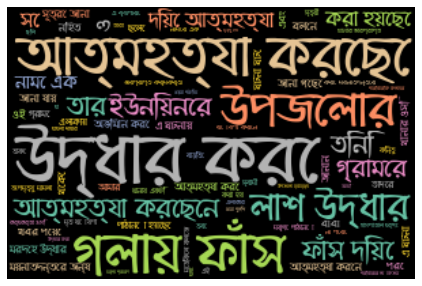

In [ ]:
text = listToString(bangla_article)

bidi_text = get_display(text)
# print(bidi_text)

# https://github.com/amueller/word_cloud/issues/367
# https://stackoverflow.com/questions/54063438/create-wordcloud-in-python-for-foreign-language-hebrew
# https://www.omicronlab.com/bangla-fonts.html

rgx = r"[\u0980-\u09FF]+"
# path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/SolaimanLipi_20-04-07.ttf"
# path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/SutonnyOMJ.ttf"

path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/new/BenSenHandwriting.ttf"
wordcloud = WordCloud(font_path=path, regexp=rgx, width = 300, height = 200, colormap='Set2').generate(bidi_text)
# wordcloud = WordCloud(font_path=path).generate(bidi_text)
# plt.rcParams['figure.figsize'] = (20,20)
# plt.rcParams["figure.dpi"] = 10
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## English Article

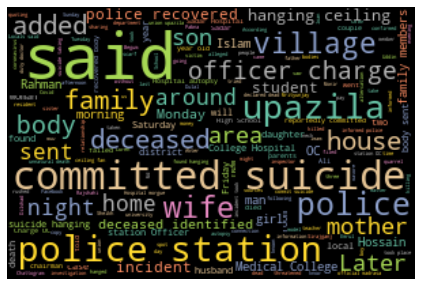

In [ ]:
text = listToString(english_article)

bidi_text = get_display(text)
# print(bidi_text)

# https://github.com/amueller/word_cloud/issues/367
# https://stackoverflow.com/questions/54063438/create-wordcloud-in-python-for-foreign-language-hebrew
# https://www.omicronlab.com/bangla-fonts.html

rgx = r"[\u0980-\u09FF]+"
# path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/SolaimanLipi_20-04-07.ttf"
# path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/SutonnyOMJ.ttf"

path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/new/BenSenHandwriting.ttf"
# wordcloud = WordCloud(font_path=path, regexp=rgx).generate(bidi_text)
wordcloud = WordCloud(width = 300, height = 200, colormap='Set2').generate(bidi_text)
# plt.rcParams['figure.figsize'] = (20,20)
# plt.rcParams["figure.dpi"] = 10
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# our data

## data load

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
from random import seed
from random import randint

In [ ]:

df = new_df
df.head()

,Unnamed: 0,full_name,age_gorup,age,gender,profession_group,religion,hometown,latitude,logitude,reason,reason_description,fix_reason,sub_reason,time,method,suicide_date,unix_time,temperature,feels_like,temp_min,temp_max,air_pressure,air_humidity,wind_speed,wind_deg,clouds_sky,weather_main,weather_description,data_source,article_writing,comments,is_addicted,marital_status,economic_condition,area,family_member,have_children,mental_issue,educational_status
0,0,Parvez,teen,22,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,Assault,false accusation,harassment,afternoon,hanging,30/10/20,1604016000,299.15,302.86,299.15,299.15,1008,83,2.10,320,40,Haze,haze,https://www.dhakatribune.com/bangladesh/nation...,\nA 22-year-old man live-streamed his suicide ...,NaN,No,NaN,Lower-Middle Class,Rural,0,0,No,NaN
1,1,Alhaj Uddin,teen,20,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,Failed love relationship,family issue,love issue,night,hanging,4/11/20,1604448000,295.57,299.17,295.57,295.57,1012,96,1.39,116,33,Clouds,scattered clouds,https://www.dhakatribune.com/bangladesh/nation...,Apparently upset over a failed love relationsh...,NaN,No,Single,Middle Class,Rural,2,0,No,NaN
2,2,Priti Akter,teen,14,female,student,muslim,manikganj,23.861650,90.000320,NaN,NaN,NaN,NaN,morning,hanging,25/9/20,1600992000,301.15,304.33,301.15,301.15,1004,78,3.60,190,75,Drizzle,drizzle,https://www.dhakatribune.com/bangladesh/nation...,Police recovered the hanging body of a school ...,NaN,No,Single,Middle Class,Rural,4,0,No,Class 9
3,3,Acchia Akhter,NaN,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,Complexities over love affair,family issue,love issue,morning,hanging,24/9/20,1600905600,299.34,303.67,299.34,299.34,1003,91,2.64,186,100,Rain,moderate rain,https://www.dhakatribune.com/bangladesh/nation...,A female student of Shahjalal University of Sc...,NaN,No,Single,Middle Class,Urban,4,0,No,Honor's
4,4,Dilshad Nahar,teen,18,female,student,muslim,dhaka,23.810331,90.412521,NaN,NaN,NaN,NaN,night,hanging,18/9/20,1600387200,300.15,304.49,300.15,300.15,1004,83,1.99,154,40,Haze,haze,https://www.dhakatribune.com/bangladesh/dhaka/...,An 18 year old girl committed suicide during a...,NaN,No,Single,Upper Middle Class,Urban,4,0,No,College


## profession group

In [ ]:
area_profession_group = df.groupby(['profession_group']).size().reset_index(name='count')
print(area_profession_group)

   profession_group  count
0             actor      1
1       businessman     12
2       day laborer      7
3      day labourer     12
4       day-laborer      2
5            doctor      3
6          engineer      1
7            farmer      8
8           gambler      1
9         housewife    149
10         houswife      1
11         musician      1
12            saint      1
13   service holder     42
14         spotsman      1
15       stportsman      1
16          student    244
17          teacher      7
18           worker     44


In [ ]:
profession_group = {}
for i in range(0, len(area_profession_group)):
    if area_profession_group['profession_group'][i] in ['actor', 'musician', 'saint']:
        profession_group['actor'] = 0

    if area_profession_group['profession_group'][i] == 'businessman':
        profession_group['businessman'] = 0
    
    if area_profession_group['profession_group'][i] in ['day laborer', 'day labourer', 'day-laborer', 'worker']:
        profession_group['day labourer'] = 0
    
    if area_profession_group['profession_group'][i] == 'farmer':
        profession_group['farmer'] = 0

    if area_profession_group['profession_group'][i] in ['housewife', 'houswife']:
        profession_group['housewife'] = 0

    if area_profession_group['profession_group'][i] in ['doctor', 'engineer', 'gambler', 'service holder']:
        profession_group['service holder'] = 0
    
    if area_profession_group['profession_group'][i] in ['spotsman', 'stportsman']:
        profession_group['athlete'] = 0
    
    if area_profession_group['profession_group'][i] == 'student':
        profession_group['student'] = 0
    
    if area_profession_group['profession_group'][i] == 'teacher':
        profession_group['teacher'] = 0
    

for i in range(0, len(area_profession_group)):
    if area_profession_group['profession_group'][i] in ['actor', 'musician', 'saint']:
        profession_group['actor'] += area_profession_group['count'][i]

    if area_profession_group['profession_group'][i] == 'businessman':
        profession_group['businessman'] += area_profession_group['count'][i]
    
    if area_profession_group['profession_group'][i] in ['day laborer', 'day labourer', 'day-laborer', 'worker']:
        profession_group['day labourer'] += area_profession_group['count'][i]
    
    if area_profession_group['profession_group'][i] == 'farmer':
        profession_group['farmer'] += area_profession_group['count'][i]

    if area_profession_group['profession_group'][i] in ['housewife', 'houswife']:
        profession_group['housewife'] += area_profession_group['count'][i]

    if area_profession_group['profession_group'][i] in ['doctor', 'engineer', 'gambler', 'service holder']:
        profession_group['service holder'] += area_profession_group['count'][i]
    
    if area_profession_group['profession_group'][i] in ['spotsman', 'stportsman']:
        profession_group['athlete'] += area_profession_group['count'][i]
    
    if area_profession_group['profession_group'][i] == 'student':
        profession_group['student'] += area_profession_group['count'][i]
    
    if area_profession_group['profession_group'][i] == 'teacher':
        profession_group['teacher'] += area_profession_group['count'][i]


print(profession_group)

{'actor': 3, 'businessman': 12, 'day labourer': 65, 'service holder': 47, 'farmer': 8, 'housewife': 150, 'athlete': 2, 'student': 244, 'teacher': 7}


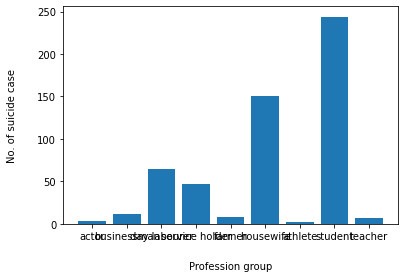

In [ ]:
plt.bar(profession_group.keys(), profession_group.values())
plt.xlabel("Profession group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (15,5)
plt.show()

## religion

In [ ]:
area_religion = df.groupby(['religion']).size().reset_index(name='count')
print(area_religion)

    religion  count
0   buddhism      1
1  christian      5
2      hindu     82
3     muslim    646


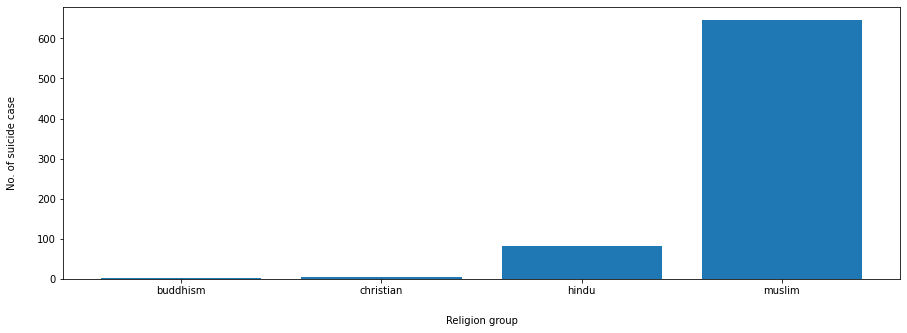

In [ ]:
plt.bar(area_religion['religion'][:], area_religion['count'][:])
plt.xlabel("Religion group", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (8,5)
plt.show()

## reason ploting

### fix data

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data modification/code/fix/reason_fix.csv'
the_df = pd.read_csv(file_path)
the_df.head()

,Unnamed: 0,reason_description,sub_reason,reason,count
0,0,\n SI assault his mother and sister,harassment,false accusation,1
1,1,\naltercation with wife,husband wife issue,family issue,1
2,2,Accusation of stealing a phone,false accusation,false accusation,1
3,3,After knowing abour her husband's ex-wife and ...,extra marital affair,family issue,1
4,4,Arguing with a woman about bamboo,quarrel with others,domestic violence,1


In [ ]:
gk = the_df.groupby(['reason']).size().reset_index(name='count')
print(gk)

                    reason  count
0                addiction      6
1        domestic violence     41
2                    fails     46
3         false accusation     22
4             family issue    170
5  mental & physical issue     62
6                 proverty     11


In [ ]:
actual_reason_group = the_df['reason_description'][:].tolist()
# print(actual_reason_group)
all_reason = []
sub_reason = []

the_count = 0

l = len(df)
for i in range(0, l):
    if df['reason_description'][i] in actual_reason_group:
        the_index = actual_reason_group.index(df['reason_description'][i])
        all_reason.append(the_df['reason'][the_index])
        sub_reason.append(the_df['sub_reason'][the_index])
    else:
        all_reason.append(np.nan)
        sub_reason.append(np.nan)
        the_count += 1


print(len(all_reason))
print(len(sub_reason))

print(the_count)
the_fix = {'fix_reason':all_reason, 'sub_reason':sub_reason} 

the_data_frame = pd.DataFrame.from_dict(the_fix)
the_data_frame.to_csv('/content/drive/MyDrive/Colab Notebooks/Data modification/code/fix/new_file.csv')

759
759
194


### others


In [ ]:
gk = df.groupby(['reason_description']).size().reset_index(name='count')
print(gk)

                                    reason_description  count
0                 \n SI assault his mother and sister       1
1                              \naltercation with wife      1
2                       Accusation of stealing a phone      1
3    After knowing abour her husband's ex-wife and ...      1
4                    Arguing with a woman about bamboo      1
..                                                 ...    ...
353                                  upset with mother      6
354                                 upset with parents      1
355                              victom of eve-teasing      1
356                                violence by in-laws      1
357                           waa doing suicide acting      1

[358 rows x 2 columns]


In [ ]:
# gk.to_csv('file.csv')
# no need now

In [ ]:
gk = df.groupby(['reason']).size().reset_index(name='count')
print(gk)

                                  reason  count
0                              addiction      6
1                      domestic violance     60
2                      domestic violence     12
3                                   fail      8
4                                  fails     30
5                       false accusation     10
6                           family issue    173
7   family issue or relationship problem      1
8                             harassment     26
9                           humilliation      1
10                        marital affair     22
11                       marital affairs      3
12                          mental issue     81
13                        physical issue     25
14                               poverty     22
15                        psysical issue      1
16                                  rape      5
17                  relatiohship problem      3
18                  relationship problem     59
19                              violance

In [ ]:
## fixing data values
reason = ['addiction', 'domestic violence', 'fails', 'false accusation', 'family issue', 'mental & physical issue', 'poverty']
count_reason = [0]*len(reason)
count = 0
for i in range(0, len(gk)):
    count += gk['count'][i]
    if gk['reason'][i] == "addiction":
        count_reason[0] += gk['count'][i]

    if gk['reason'][i] in ["domestic violance", "domestic violence", "rape", "violance", "violence", "voilence", "violence ans mental issue"]:
        count_reason[1] += gk['count'][i]

    if gk['reason'][i] in ["fails", "fail"]:
        count_reason[2] += gk['count'][i]
    
    if gk['reason'][i] in [ "false accusation", "harassment", "humilliation"]:
        count_reason[3] += gk['count'][i]

    if gk['reason'][i] in ["family issue", "family issue or relationship problem", "marital affair", "marital affairs", "relatiohship problem", "relationship problem"]:
        count_reason[4] += gk['count'][i]

    if gk['reason'][i] in ["mental issue", "physical issue", "psysical issue"]:
        count_reason[5] += gk['count'][i]

    if gk['reason'][i] == "poverty":
        count_reason[6] += gk['count'][i]
    
print(count_reason)
# print(sum(count_reason))
# print(count)


[6, 98, 38, 37, 261, 107, 22]


In [ ]:
a = {'addiction': 6, 'domestic violence': 98, 'fails': 38, 'false accusation': 37, 'family issue': 261, 'mental & physical issue': 107, 'poverty': 22}
print( a)

{'addiction': 6, 'domestic violence': 98, 'fails': 38, 'false accusation': 37, 'family issue': 261, 'mental & physical issue': 107, 'poverty': 22}


In [ ]:
x = l = ["Number of cases", "Suicide cases", { "role": "style" }]

print(x)

['Number of cases', 'Suicide cases', {'role': 'style'}]


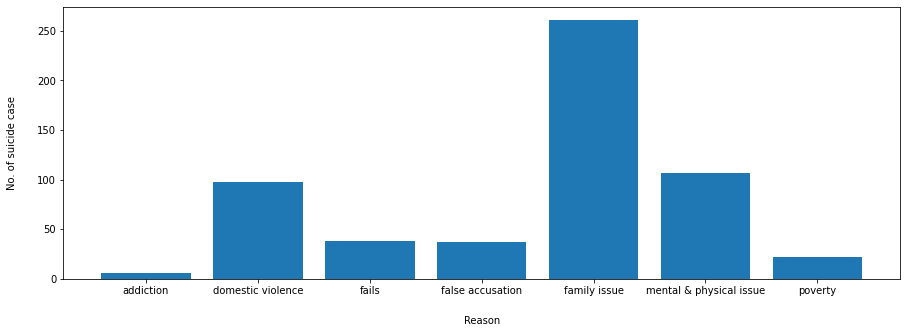

In [ ]:
plt.bar(reason, count_reason)
plt.xlabel("Reason", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (15,5)
plt.show()

### plotaing the fix value


In [ ]:
gk = df.groupby(['fix_reason']).size().reset_index(name='count')
print(gk)

                fix_reason  count
0                addiction      6
1        domestic violence     92
2                    fails     70
3         false accusation     19
4             family issue    281
5  mental & physical issue     82
6                 proverty     15


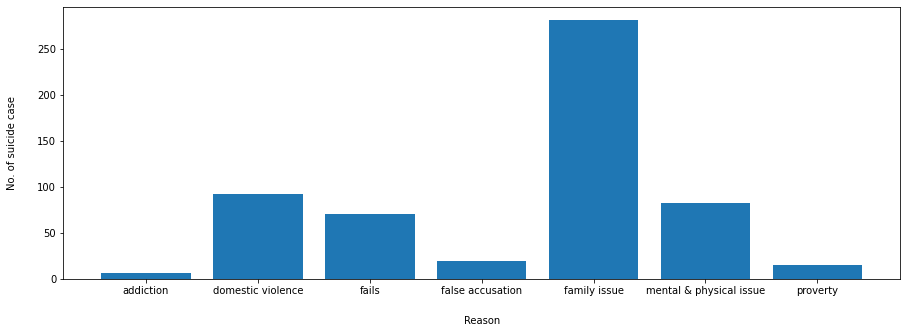

In [ ]:
plt.bar(gk['fix_reason'][:], gk['count'][:])
plt.xlabel("Reason", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (15,5)
plt.show()

In [ ]:
gk = df.groupby(['sub_reason']).size().reset_index(name='count')
print(gk)

                    sub_reason  count
0                      anxiety      2
1                  blackmailed      2
2                   depression     22
3       didn't accept marriage      6
4                     divorced      2
5            domestic violence     29
6               drug addiction      5
7                  eve teasing      4
8         extra marital affair     13
9                fail buy drug      1
10                fail in exam     19
11                 fail in job      5
12                 fail to pay     22
13            false accusation      7
14   family didn't buy product     18
15                family fight     38
16                family issue     72
17             forced marriage     12
18                  frustation      2
19                  harassment     12
20          husband wife issue     43
21                 job failure      3
22                   lonliness      2
23                love failure     20
24                  love issue     36
25          

In [ ]:
gk_reason = df.groupby(['fix_reason']).size().reset_index(name='count')
the_sub_reason_list = gk['sub_reason'][:].tolist()
the_count = gk['count'][:].tolist()
the_reason_list = gk_reason['fix_reason'][:].tolist()

print(the_sub_reason_list)
print(the_count)
print(the_reason_list)

['anxiety', 'blackmailed', 'depression', "didn't accept marriage", 'divorced', 'domestic violence', 'drug addiction', 'eve teasing', 'extra marital affair', 'fail buy drug', 'fail in exam', 'fail in job', 'fail to pay', 'false accusation', "family didn't buy product", 'family fight', 'family issue', 'forced marriage', 'frustation', 'harassment', 'husband wife issue', 'job failure', 'lonliness', 'love failure', 'love issue', 'mental illness', 'money problem', 'not get expected result', 'not having child', 'physical illness', 'proverty', 'quarrel with family member', 'quarrel with others', 'rape', 'stress', 'torture', 'unemployment']
[2, 2, 22, 6, 2, 29, 5, 4, 13, 1, 19, 5, 22, 7, 18, 38, 72, 12, 2, 12, 43, 3, 2, 20, 36, 21, 1, 4, 1, 23, 10, 70, 3, 7, 11, 13, 4]
['addiction', 'domestic violence', 'fails', 'false accusation', 'family issue', 'mental & physical issue', 'proverty']


In [ ]:
size = len(df)
the_relation_list = [0]*len(the_sub_reason_list)
for i in range(0, size):
    if df['sub_reason'][i] in the_sub_reason_list:
        the_index = the_sub_reason_list.index(df['sub_reason'][i])
        the_relation_list[the_index] = df['fix_reason'][i]

print(the_relation_list)


['mental & physical issue', 'domestic violence', 'mental & physical issue', 'family issue', 'mental & physical issue', 'domestic violence', 'addiction', 'domestic violence', 'family issue', 'addiction', 'fails', 'fails', 'fails', 'false accusation', 'family issue', 'domestic violence', 'family issue', 'family issue', 'mental & physical issue', 'false accusation', 'family issue', 'fails', 'mental & physical issue', 'fails', 'family issue', 'family issue', 'proverty', 'fails', 'family issue', 'mental & physical issue', 'proverty', 'family issue', 'domestic violence', 'domestic violence', 'mental & physical issue', 'domestic violence', 'proverty']


In [ ]:
print(len(the_sub_reason_list))
print(len(the_relation_list))

37
37


In [ ]:
# make format
print(count_list)
sublist = the_sub_reason_list
count_list = the_count
reason_list = the_reason_list
relation_list = the_relation_list



the_list = []
l = sublist.copy()
l.append({ 'role': 'annotation' })
the_list.append(l)

for i in range(0, len(reason_list)):
    the_reason = reason_list[i] # get the reason
    l = []
    l.append(the_reason)
    for j in range(0, len(sublist)):
        if relation_list[j] == the_reason: #if that match with the reaon add count value to that index
            l.append(count_list[i])
        else:
            l.append(0)
    the_list.append(l)


for x in the_list:
    print(x)

[2, 2, 22, 6, 2, 29, 5, 4, 13, 1, 19, 5, 22, 7, 18, 38, 72, 12, 2, 12, 43, 3, 2, 20, 36, 21, 1, 4, 1, 23, 10, 70, 3, 7, 11, 13, 4]
['anxiety', 'blackmailed', 'depression', "didn't accept marriage", 'divorced', 'domestic violence', 'drug addiction', 'eve teasing', 'extra marital affair', 'fail buy drug', 'fail in exam', 'fail in job', 'fail to pay', 'false accusation', "family didn't buy product", 'family fight', 'family issue', 'forced marriage', 'frustation', 'harassment', 'husband wife issue', 'job failure', 'lonliness', 'love failure', 'love issue', 'mental illness', 'money problem', 'not get expected result', 'not having child', 'physical illness', 'proverty', 'quarrel with family member', 'quarrel with others', 'rape', 'stress', 'torture', 'unemployment', {'role': 'annotation'}]
['addiction', 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['domestic violence', 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0

## ploting area


In [ ]:
area_group = df.groupby(['hometown']).size().reset_index(name='count')
print(area_group)

       hometown  count
0      bagerhat      4
1     bagherhat      2
2     bandarban      3
3       bankura      1
4       barguna     10
..          ...    ...
131   sunamganj      4
132      sylhet     17
133     tangail     13
134       tangi      1
135  thakurgaon     18

[136 rows x 2 columns]


In [ ]:
area_list = []
count_list = []
for i in range(0, len(area_group)):
    area_list.append(area_group['hometown'][i])
    count_list.append(area_group['count'][i])

In [ ]:
print(area_list)
print(count_list)

['bagerhat', 'bagherhat', 'bandarban', 'bankura', 'barguna', 'barisal', 'barishal', 'bhola', 'bogra', 'bogura', 'borguna', 'brahmanbari', 'brahmanbaria', 'chadpur', 'chandpur', 'chapainawabgang', 'chapainawabganj', 'chapainobabgonj', 'chattagram', 'chattogram', 'chattrogram', 'chittagong', 'chuadanga', 'comilla', "cox's bazar", 'dhaka', 'dinajpur', 'doulotpur', 'faridpur', 'feni', 'fulbari', 'gaibandha', 'gangni', 'gazipur', 'gopalgang', 'gopalganj', 'habigang', 'habiganj', 'habigonj', 'hobigonj', 'jaipurhat', 'jamalpur', 'jaypurhat', 'jessore', 'jhalokati', 'jhenaidah', 'jhinaidah', 'jhinaidaha', 'jhinaidoho', 'joshore', 'jossore', 'joypurhat', 'keshobpur', 'khagrachari', 'khagrachori', 'khulna', 'kisharganj', 'kishorganj', 'kulaura', 'kurigram', 'kushtia', 'kustia', 'lakkhipur', 'lalmonirhat', 'lalmonirhath', 'laxmipiur', 'lokkhipur', 'madaripur', 'madhabpur', 'madhupur', 'magura', 'manikgang', 'manikganj', 'manikgonj', 'mawa', 'meherpur', 'mirpur', 'monirampur', 'moulovibazar', 'mou

### fixing data area

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data modification/code/fix/area data fix.csv'
df_fix_data_area = pd.read_csv(file_path)
print(df_fix_data_area)

           Area    district    division
0      bagerhat    Bagerhat      Khulna
1     bagherhat    Bagerhat      Khulna
2     bandarban   Bandarban  Chattagram
3       bankura    Bagerhat      Khulna
4       barguna    Barguna      Barisal
..          ...         ...         ...
132   sunamganj   Sunamganj      Sylhet
133      sylhet      Sylhet      Sylhet
134     tangail     Tangail       Dhaka
135       tangi     Gazipur       Dhaka
136  thakurgaon  Thakurgaon     Rangpur

[137 rows x 3 columns]


#### add district and division


In [ ]:
l = len(new_df)
area_list =  df_fix_data_area['Area'][:].tolist()
district_list =  df_fix_data_area['district'][:].tolist()
division_list =  df_fix_data_area['division'][:].tolist()

the_home_update = []
the_district = []
the_division = []

for i in range(0, l):
    area = new_df['hometown'][i]
    index = area_list.index(area)
    the_home_update.append(area)
    the_district.append(district_list[index])
    the_division.append(division_list[index])


# print(len(the_district), " ", len(the_division))

the_dict = {"update_home_town":the_home_update, "district":the_district, "division":the_division}

df_convert = pd.DataFrame(the_dict) 
df_convert.to_csv('area_data.csv') 

In [ ]:
division_group = df_fix_data_area.groupby(['division']).size().reset_index(name='count')
print(division_group)

     division  count
0     Barisal      9
1  Chattagram     25
2       Dhaka     28
3      Khulna     23
4  Mymensingh      8
5    Rajshahi     17
6     Rangpur     15
7      Sylhet     12


In [ ]:
distict_group = df_fix_data_area.groupby(['district']).size().reset_index(name='count')
print(distict_group)

      district  count
0     Bagerhat      3
1    Bandarban      1
2     Barguna       2
3      Barisal      2
4        Bhola      1
..         ...    ...
59   Sirajganj      4
60   Sunamganj      2
61      Sylhet      1
62     Tangail      1
63  Thakurgaon      1

[64 rows x 2 columns]


In [ ]:
# for x in range (0, len(distict_group)):
#     print(distict_group['district'][x])

In [ ]:
division_map = {"Barisal" :0,
                "Chattagram" :0,
                "Dhaka" :0,
                "Khulna" :0,
                "Mymensingh" :0,
                "Rajshahi" :0,
                "Rangpur" :0,
                "Sylhet" :0}

# division_map["Barisal"] += 5 ##test
# division_map["Barisal"] += 5
# print(division_map["Barisal"])

In [ ]:
the_area = []
the_district = []
the_division = []
for i in range(0, len(df_fix_data_area)):
    the_area.append(df_fix_data_area['Area'][i])
    the_district.append(df_fix_data_area['district'][i])
    the_division.append(df_fix_data_area['division'][i])

# print(the_area)
# print(the_district)
# print(the_division)

In [ ]:
distict_map_barisal = {}
distict_map_chattagram = {}
distict_map_dhaka = {}
distict_map_khulna = {}
distict_map_mymensingh = {}
distict_map_rajshahi = {}
distict_map_rangpur = {}
distict_map_sylhet = {}
for i in range(0, len(the_district)):
    if the_division[i] == "Barisal":
        distict_map_barisal[the_district[i]] = 0

    if the_division[i] == "Chattagram":
        distict_map_chattagram[the_district[i]] = 0
    
    if the_division[i] == "Dhaka":
        distict_map_dhaka[the_district[i]] = 0
    
    if the_division[i] == "Khulna":
        distict_map_khulna[the_district[i]] = 0
    
    if the_division[i] == "Mymensingh":
        distict_map_mymensingh[the_district[i]] = 0
    
    if the_division[i] == "Rajshahi":
        distict_map_rajshahi[the_district[i]] = 0
    
    if the_division[i] == "Rangpur":
        distict_map_rangpur[the_district[i]] = 0
    
    if the_division[i] == "Sylhet":
        distict_map_sylhet[the_district[i]] = 0
    

# print(distict_map_barisal)
# print(distict_map_chattagram)
# print(distict_map_dhaka)
# print(distict_map_khulna)
# print(distict_map_mymensingh)
# print(distict_map_rajshahi)
# print(distict_map_rangpur)
# print(distict_map_sylhet)

In [ ]:
for i in range(0, len(area_list)):
    if area_list[i] in the_area:
        index = the_area.index(area_list[i])
        district = the_district[index]
        division = the_division[index]
        division_map[division] += count_list[i]

        if division == "Barisal":
            distict_map_barisal[district] += count_list[i]

        elif division == "Chattagram":
            distict_map_chattagram[district] += count_list[i]
        
        elif division == "Dhaka":
            distict_map_dhaka[district] += count_list[i]
        
        elif division == "Khulna":
            distict_map_khulna[district] += count_list[i]
        
        elif division == "Mymensingh":
            distict_map_mymensingh[district] += count_list[i]
        
        elif division == "Rajshahi":
            distict_map_rajshahi[district] += count_list[i]
        
        elif division == "Rangpur":
            distict_map_rangpur[district] += count_list[i]
        
        elif division == "Sylhet":
            distict_map_sylhet[district] += count_list[i]
            
print(division_map)

print(distict_map_barisal)
print(distict_map_chattagram)
print(distict_map_dhaka)
print(distict_map_khulna)
print(distict_map_mymensingh)
print(distict_map_rajshahi)
print(distict_map_rangpur)
print(distict_map_sylhet)

{'Barisal': 67, 'Chattagram': 115, 'Dhaka': 136, 'Khulna': 108, 'Mymensingh': 67, 'Rajshahi': 138, 'Rangpur': 72, 'Sylhet': 56}
{'Barguna ': 12, 'Barisal': 18, 'Bhola': 8, 'Jhalokati': 2, 'Patuakhali': 12, 'Pirojpur': 15}
{'Bandarban': 3, 'Brahmanbaria': 15, 'Chandpur': 17, 'Chapainawabganj': 7, 'Chattagram': 25, 'Comilla': 19, "Cox's Bazar ": 1, 'Feni': 4, 'Khagrachhari': 3, 'Lakshmipur': 5, 'Noakhali': 14, 'Rangamati': 2}
{'Dhaka': 27, 'Faridpur': 7, 'Gazipur': 11, 'Gopalganj': 13, 'Kishoreganj': 2, 'Madaripur': 3, 'Manikganj': 9, 'Munshiganj': 9, 'Narayanganj': 16, 'Narsingdi': 12, 'Rajbari': 11, 'Shariatpur': 3, 'Tangail': 13}
{'Bagerhat': 7, 'Chuadanga': 3, 'Kushtia': 11, 'Meherpur': 9, 'Jessore': 27, 'Jhenaidah': 11, 'Khulna': 10, 'Magura': 16, 'Narail': 3, 'Satkhira': 11}
{'Jamalpur': 13, 'Mymensingh': 23, 'Netrokona': 23, 'Sherpur': 8}
{'Bogura': 30, 'Joypurhat': 7, 'Naogaon ': 18, 'Natore': 20, 'Pabna': 20, 'Rajshahi': 29, 'Chapainawabganj': 1, 'Sirajganj': 13}
{'Dinajpur': 11

### Division


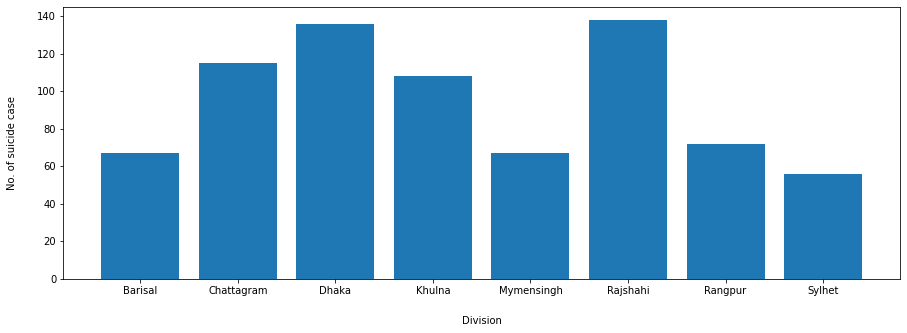

In [ ]:
## plot
plt.bar(division_map.keys(), division_map.values())
plt.xlabel("Division", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (15,5)
plt.show()

### Barisal

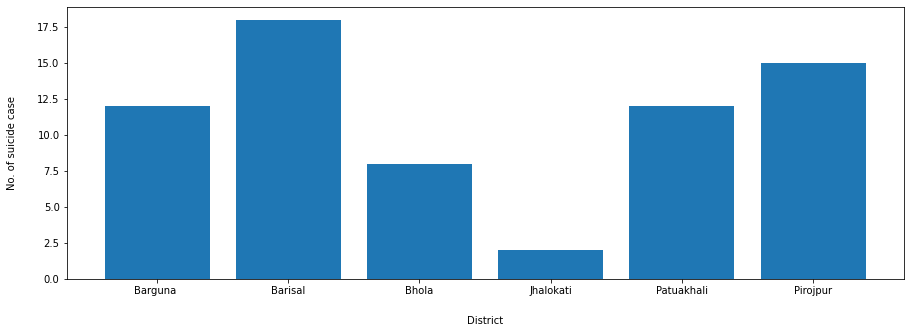

In [ ]:
## plot
plt.bar(distict_map_barisal.keys(), distict_map_barisal.values())
plt.xlabel("District", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (9,5)
plt.show()

### Chattagram

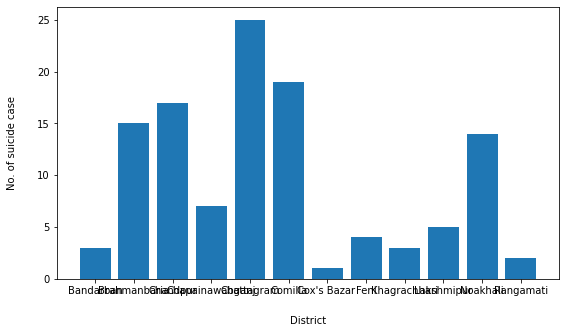

In [ ]:
## plot
plt.bar(distict_map_chattagram.keys(), distict_map_chattagram.values())
plt.xlabel("District", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (18,5)
plt.show()

### Dhaka

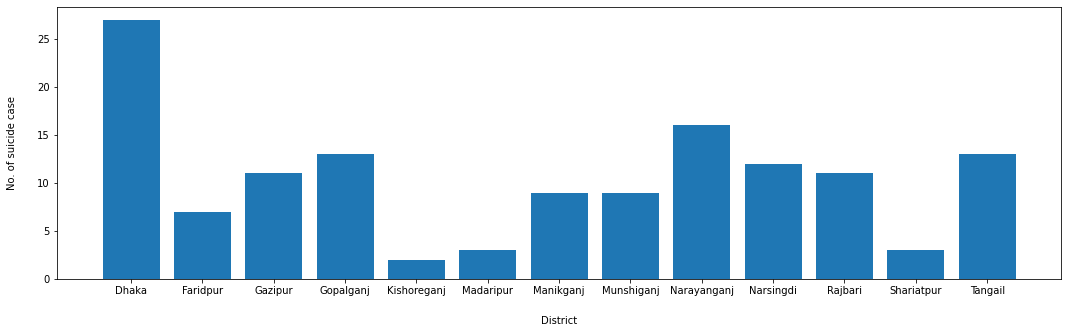

In [ ]:
## plot
plt.bar(distict_map_dhaka.keys(), distict_map_dhaka.values())
plt.xlabel("District", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (18,5)
plt.show()

### Khulna

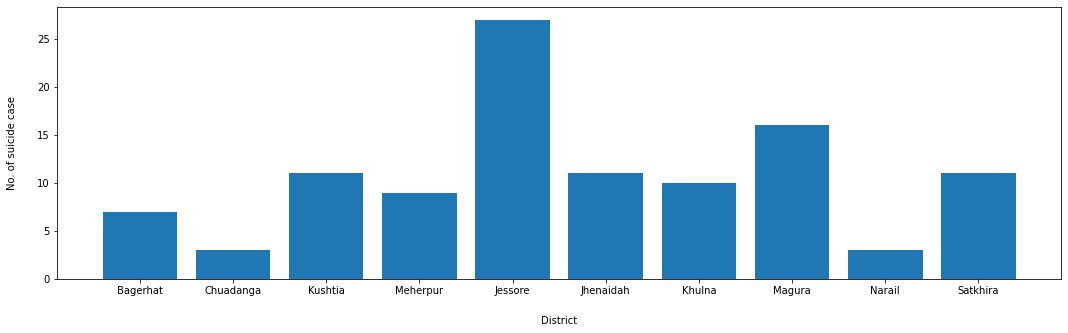

In [ ]:
## plot
plt.bar(distict_map_khulna.keys(), distict_map_khulna.values())
plt.xlabel("District", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (15,5)
plt.show()

### Mymensingh

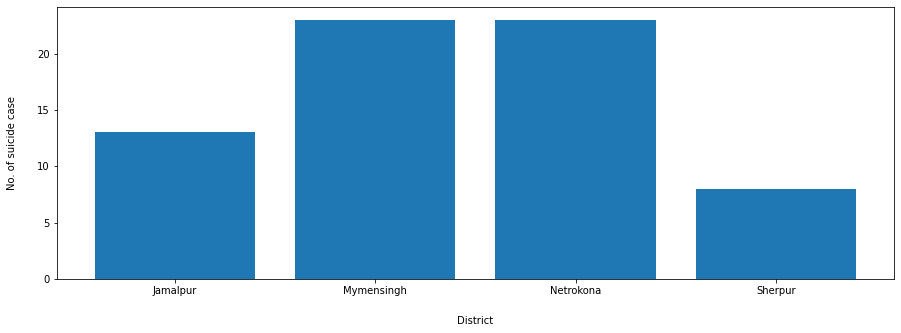

In [ ]:
## plot
plt.bar(distict_map_mymensingh.keys(), distict_map_mymensingh.values())
plt.xlabel("District", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (7,5)
plt.show()

### Rajshahi

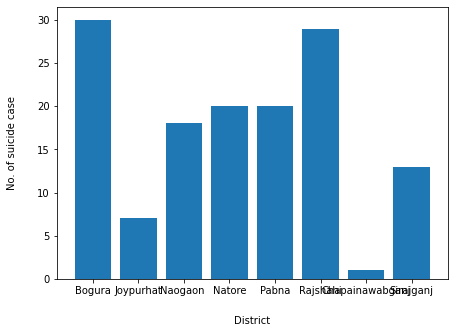

In [ ]:
## plot
plt.bar(distict_map_rajshahi.keys(), distict_map_rajshahi.values())
plt.xlabel("District", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (12,5)
plt.show()

### Rangpur

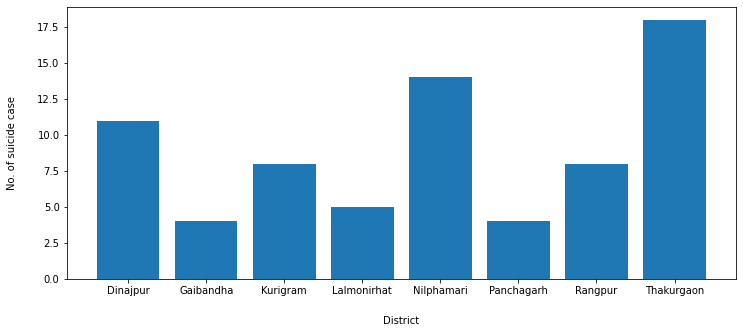

In [ ]:
## plot
plt.bar(distict_map_rangpur.keys(), distict_map_rangpur.values())
plt.xlabel("District", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (15,5)
plt.show()

### Sylhet

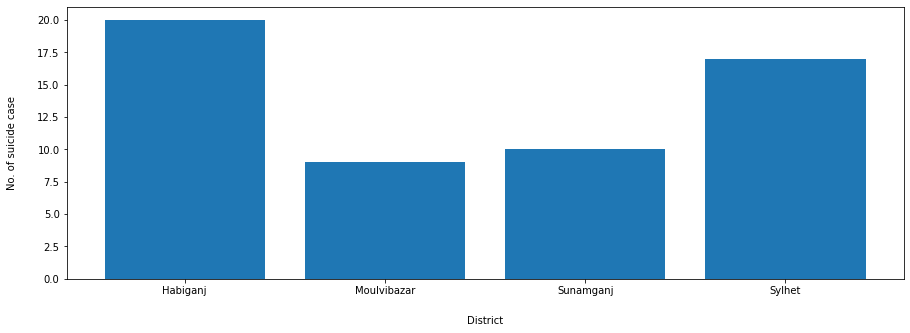

In [ ]:
## plot
plt.bar(distict_map_sylhet.keys(), distict_map_sylhet.values())
plt.xlabel("District", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (7,5)
plt.show()

## method ploting


In [ ]:
method_group = df.groupby(['method']).size().reset_index(name='count')
method_group.head()

,method,count
0,belt,2
1,by consuming gas tablets,4
2,by consuming rat poison,2
3,by consuming rodenticide (rat poison),1
4,by pushing injection,1


In [ ]:
method_list = []
method_count_list = []
for i in range(0, len(method_group)):
    method_list.append(method_group['method'][i])
    method_count_list.append(method_group['count'][i])

In [ ]:
# for x in method_list:
#     print(x)

### fix data method 

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data modification/code/fix/method data fix.csv'
df_fix_method = pd.read_csv(file_path)
df_fix_method.head()

,Method,Group
0,belt,hanging
1,by consuming gas tablets,taking pills
2,by consuming rat poison,poison
3,by consuming rodenticide (rat poison),poison
4,by pushing injection,taking injection


In [ ]:
the_list = df_fix_method['Method'][:].tolist()
the_fix_method = df_fix_method['Group'][:].tolist()
l = []
for i in range(0, len(df)):
    the_method = df['method'][i]
    if the_method in the_list:
        index = the_list.index(the_method)
        l.append(the_fix_method[index])
    else:
        l.append(np.nan)

print(l)

dic = {'fix_method':l}
frame = pd.DataFrame.from_dict(dic)   
frame.to_csv('file1.csv')

['hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'poison', 'cutting neck', 'poison', 'railway track', 'poison', 'hanging', 'hanging', 'poison', 'hanging', nan, 'hanging', 'hanging', 'hanging', 'poison', 'hanging', 'hanging', 'poison', 'hanging', 'hanging', 'hanging', 'poison', 'hanging', 'hanging', 'Jumping over', 'hanging', 'poison', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'poison', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', nan, 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'poison', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'hanging', 'poison', nan, 'hanging', 'hanging', 'hanging', 'hanging', 'poison', 'hanging', 'hanging', 'hanging', 'poison', 'hanging', 'h

In [ ]:
method_map = {}
the_method = []
the_group = []
for i in range(0, len(df_fix_method)):
    the_method.append(df_fix_method['Method'][i])
    the_group.append(df_fix_method['Group'][i])
    method_map[df_fix_method['Group'][i]] = 0

print(method_map)

{'hanging': 0, 'taking pills': 0, 'poison': 0, 'taking injection': 0, 'cutting neck': 0, 'electric shock': 0, 'Jumping over': 0, 'firing himself': 0, 'railway track': 0}


In [ ]:
for i in range(0, len(method_list)):
    if method_list[i] in the_method:
        index = the_method.index(method_list[i])
        group = the_group[index]
        method_map[group] += method_count_list[i]

l = method_map.keys()
print(l)

dict_keys(['hanging', 'taking pills', 'poison', 'taking injection', 'cutting neck', 'electric shock', 'Jumping over', 'firing himself', 'railway track'])


### plot method

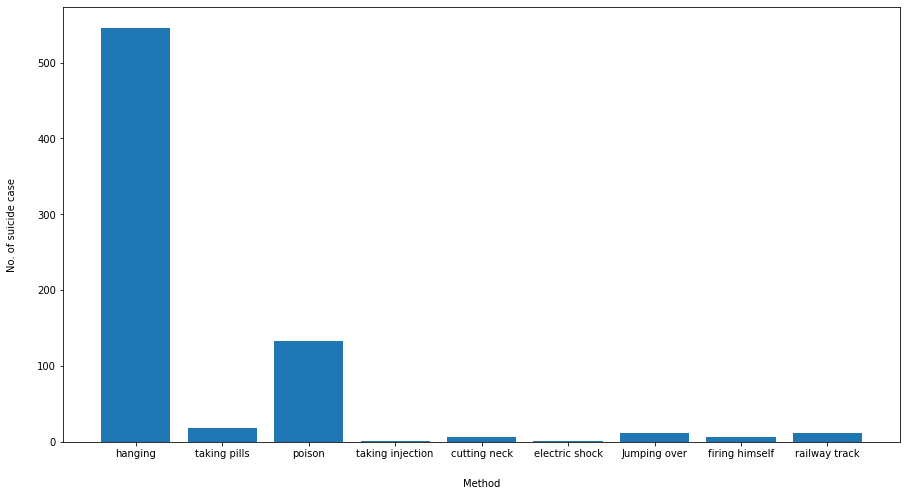

In [ ]:
## plot
plt.bar(method_map.keys(), method_map.values())
plt.xlabel("Method", labelpad=20)
plt.ylabel("No. of suicide case", labelpad=20)
plt.rcParams['figure.figsize'] = (15,8)
plt.show()

## WORD CLOUD

In [ ]:
!pip install python-bidi
!pip install wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display
!pip install bangla
from PIL import ImageFont, Image, ImageDraw, ImageChops, ImageOps

### LOAD TEXT

In [ ]:
input_path_status = '/content/drive/MyDrive/Colab Notebooks/Data modification/code/status.csv'
df_status = pd.read_csv(input_path_status)
df_status.head()

,status,add by
0,আমার মৃত্যুর জন্য কেউ দায়ী নয়। আমি চাই আম্মু ...,arafat
1,আমি চাইনা তোমরা আমাকে বাঁচাও। তোমরা আমাকে বাঁচ...,arafat
2,শুভ্রত যদি আমাকে বিয়ে না করতে চাই তাহলে আমি মর...,arafat
3,সুমিকে না পেলে আমি বিষ খাবো - আরিফ,arafat
4,আরে খোকার সাথে মাটি দিবেন। আমি খোকারে ছাড়া থাক...,arafat


In [ ]:
status_list = []
for i in range(0, len(df_status)):
    status_list.append(df_status['status'][i])

### CLOUD IMAGE

In [ ]:
## Prepare text
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

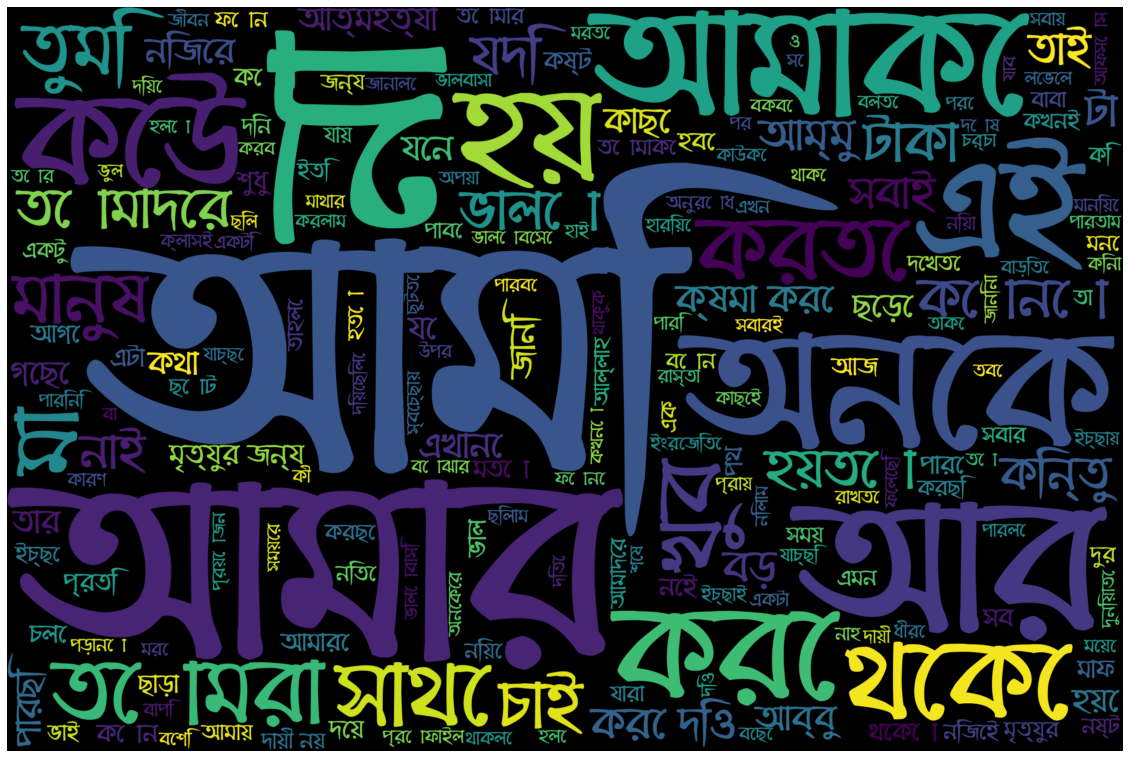

In [ ]:
text = listToString(status_list)

bidi_text = get_display(text)
# print(bidi_text)

# https://github.com/amueller/word_cloud/issues/367
# https://stackoverflow.com/questions/54063438/create-wordcloud-in-python-for-foreign-language-hebrew
# https://www.omicronlab.com/bangla-fonts.html

rgx = r"[\u0980-\u09FF]+"
# path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/SolaimanLipi_20-04-07.ttf"
# path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/SutonnyOMJ.ttf"

path = "/content/drive/MyDrive/Colab Notebooks/Data modification/code/fonts/new/BenSenHandwriting.ttf"
wordcloud = WordCloud(font_path=path, regexp=rgx, width = 3000, height = 2000).generate(bidi_text)
# wordcloud = WordCloud(font_path=path).generate(bidi_text)
plt.rcParams['figure.figsize'] = (20,20)
# plt.rcParams["figure.dpi"] = 10
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## fix error text missmatch 

In [ ]:
!python3 -m pip install --upgrade pip
!python3 -m pip install --upgrade Pillow

     |████████████████████████████████| 1.6MB 8.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 3.0 MB 7.8 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!sudo pip3 install Pillow

In [ ]:
!sudo apt-get install libfreetype6-dev libharfbuzz-dev libfribidi-dev gtk-doc-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libharfbuzz-dev is already the newest version (1.7.2-1ubuntu1).
libharfbuzz-dev set to manually installed.
libfreetype6-dev is already the newest version (2.8.1-2ubuntu2.1).
The following additional packages will be installed:
  docbook docbook-to-man docbook-xml docbook-xsl highlight highlight-common
  liblua5.2-0 libosp5 opensp python-funcsigs python-mock python-pbr
  python-pkg-resources python-six sgml-base sgml-data xml-core xsltproc
Suggested packages:
  docbook-defguide docbook-dsssl psgml dbtoepub docbook-xsl-doc-html
  | docbook-xsl-doc-pdf | docbook-xsl-doc-text | docbook-xsl-doc
  docbook-xsl-saxon fop libsaxon-java libxalan2-java libxslthl-java xalan
  dblatex doc-base python-funcsigs-doc python-mock-doc python-setuptools
  sgml-base-doc perlsgml w3-recs libxml2-utils debhelper
The following NEW packages will be installed:
  docbook docbook-to-man docbook-xml docbook-xsl gtk-doc-

In [ ]:
!pip install libraqm
!sudo ldconfig

ERROR: Could not find a version that satisfies the requirement libraqm (from versions: none)
ERROR: No matching distribution found for libraqm
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
!sudo apt install fonts-indic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-beng fonts-beng-extra fonts-deva fonts-deva-extra fonts-gargi
  fonts-gubbi fonts-gujr fonts-gujr-extra fonts-guru fonts-guru-extra
  fonts-kalapi fonts-knda fonts-lohit-beng-assamese fonts-lohit-beng-bengali
  fonts-lohit-deva fonts-lohit-gujr fonts-lohit-guru fonts-lohit-knda
  fonts-lohit-mlym fonts-lohit-orya fonts-lohit-taml
  fonts-lohit-taml-classical fonts-lohit-telu fonts-mlym fonts-nakula
  fonts-navilu fonts-orya fonts-orya-extra fonts-pagul fonts-sahadeva
  fonts-samyak-deva fonts-samyak-gujr fonts-samyak-mlym fonts-samyak-taml
  fonts-sarai fonts-smc fonts-smc-anjalioldlipi fonts-smc-chilanka
  fonts-smc-dyuthi fonts-smc-karumbi fonts-smc-keraleeyam fonts-smc-manjari
  fonts-smc-meera fonts-smc-rachana fonts-smc-raghumalayalamsans
  fonts-smc-suruma fonts-smc-uroob fonts-taml fonts-telu fonts-telu-extra
The following N

## LIWC

In [ ]:
input_path_status = '/content/drive/MyDrive/Colab Notebooks/Data modification/code/status.csv'
df_status = pd.read_csv(input_path_status)
df_status.head()

,status,add by
0,আমার মৃত্যুর জন্য কেউ দায়ী নয়। আমি চাই আম্মু ...,arafat
1,আমি চাইনা তোমরা আমাকে বাঁচাও। তোমরা আমাকে বাঁচ...,arafat
2,শুভ্রত যদি আমাকে বিয়ে না করতে চাই তাহলে আমি মর...,arafat
3,সুমিকে না পেলে আমি বিষ খাবো - আরিফ,arafat
4,আরে খোকার সাথে মাটি দিবেন। আমি খোকারে ছাড়া থাক...,arafat


In [ ]:
status_list = []
for i in range(0, len(df_status)):
    status_list.append(df_status['status'][i])

# PERVIOUS


## prepare data cluster


In [ ]:
mental_issue_group_list = ['mental issue', 'physical issue', 'psysical issue']
addiction_group_list = ['addiction']
violence_group_list = ['domestic violance', 'domestic violence', 'false accusation', 'harassment', 'humilliation', 'rape', 'violance', 'violence', 'voilence', 'violence ans mental issue']
family_issue_group_list = ['family issue', 'family issue or relationship problem', 'marital affair', 'marital affairs', 'relatiohship problem', 'relationship problem']
proverty_group_list = ['poverty']
fails_group_list = ['fail', 'fails']

In [ ]:
mental_issue = []
addiction = []
violence = []
family_issue = []
proverty = []
fails = []

seed(45)

for i in range (0, len(df)):
    value = randint(0, 5)

    #mental_issue
    if df['fix_reason'][i] in mental_issue_group_list: 
        mental_issue.append(1)
    elif (df['fix_reason'][i] is np.nan) and value is 0:
        mental_issue.append(1)
    else:
        mental_issue.append(0)

    #addiction
    if df['fix_reason'][i] in addiction_group_list: 
        addiction.append(1)
    elif (df['fix_reason'][i] is np.nan) and value is 1:
        addiction.append(1)
    else:
        addiction.append(0)

    #violence
    if df['fix_reason'][i] in violence_group_list: 
        violence.append(1)
    elif (df['fix_reason'][i] is np.nan) and value is 2:
        violence.append(1)
    else:
        violence.append(0)

    #family_issue
    if df['fix_reason'][i] in family_issue_group_list: 
        family_issue.append(1)
    elif (df['fix_reason'][i] is np.nan) and value is 3:
        family_issue.append(1)
    else:
        family_issue.append(0)

    
    #proverty
    if df['fix_reason'][i] in proverty_group_list: 
        proverty.append(1)
    elif (df['fix_reason'][i] is np.nan) and value is 4:
        proverty.append(1)
    else:
        proverty.append(0)

    
    #proverty
    if df['fix_reason'][i] in fails_group_list: 
        fails.append(1)
    elif (df['fix_reason'][i] is np.nan) and value is 5:
        fails.append(1)
    else:
        fails.append(0)


In [ ]:
print(len(mental_issue))
print(len(addiction))
print(len(violence))
print(len(family_issue))
print(len(proverty))
print(len(fails))

759
759
759
759
759
759


## make into data frame

In [ ]:
dict = {'mental_issue': mental_issue, 'addiction': addiction, 'violence': violence, 'family_issue': family_issue, 'proverty': proverty, 'fails': fails} 
new_df = pd.DataFrame(dict)  
# saving the dataframe  
savePath = '/content/drive/MyDrive/Colab Notebooks/Data modification/code/cluster_data.csv'
new_df.to_csv(savePath)  
print("done")

done


In [ ]:
# data 
import pandas as pd
df_cluster = pd.read_csv(savePath)
df_cluster.head()

,Unnamed: 0,mental_issue,addiction,violence,family_issue,proverty,fails
0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0
2,2,0,0,0,1,0,0
3,3,0,0,0,1,0,0
4,4,1,0,0,0,0,0


In [ ]:
df_used_cluster = df_cluster.drop(df.columns[[0]], axis=1)  

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_used_cluster)
print(cluster.labels_)

[2 3 3 3 0 2 3 2 0 3 1 2 1 2 2 1 3 3 2 3 3 2 3 3 3 1 3 1 5 3 3 3 3 0 4 0 3
 3 3 3 0 3 3 3 3 3 3 1 1 3 3 0 3 1 2 3 0 3 5 3 0 1 2 2 3 4 1 0 4 3 3 3 3 3
 3 3 3 3 4 5 3 5 3 1 3 0 3 3 3 3 3 0 2 5 2 2 3 3 0 3 3 3 3 3 3 3 1 3 1 3 3
 3 3 3 4 2 2 3 0 1 5 1 4 3 3 4 3 5 3 3 0 3 3 3 0 2 3 1 3 3 3 4 3 1 2 0 3 3
 3 0 3 3 3 3 3 1 3 0 0 2 3 2 1 3 3 3 2 3 3 4 3 0 3 1 3 3 3 3 0 1 3 1 5 2 3
 3 3 4 0 0 0 3 0 2 5 3 3 2 3 3 3 3 3 2 1 3 1 0 3 3 3 0 3 0 3 0 3 4 3 1 3 3
 4 2 2 3 3 3 2 1 4 1 3 3 3 0 3 5 3 0 3 5 3 3 1 3 3 3 3 4 0 2 3 1 3 3 1 2 5
 5 1 2 1 1 2 1 3 1 1 0 3 0 0 3 0 0 1 3 3 3 3 2 3 3 2 2 0 3 3 3 3 5 3 2 1 0
 0 3 2 0 0 3 0 0 0 1 0 2 3 5 0 3 3 0 5 3 1 3 3 1 3 3 3 3 3 2 3 0 2 2 0 4 2
 2 2 1 0 0 3 0 4 2 0 3 1 0 2 0 2 2 3 3 3 3 1 3 0 0 3 0 5 2 4 0 0 0 2 1 1 2
 2 3 3 2 3 3 3 2 2 3 3 2 2 2 0 5 3 3 3 3 3 2 2 3 2 0 2 2 0 4 2 5 4 0 3 2 1
 0 1 3 0 3 0 2 0 3 2 4 2 0 2 0 3 3 0 0 2 3 2 2 3 3 2 3 2 4 2 0 2 0 0 3 2 0
 3 2 2 3 2 1 3 3 0 2 2 1 3 3 3 1 2 5 0 2 0 0 5 0 3 0 3 3 2 0 4 2 3 4 1 3 3
 3 0 3 3 2 2 2 0 2 2 0 3 

In [ ]:
#Linkage Matrix
Z = linkage(df_used_cluster, method = 'ward')

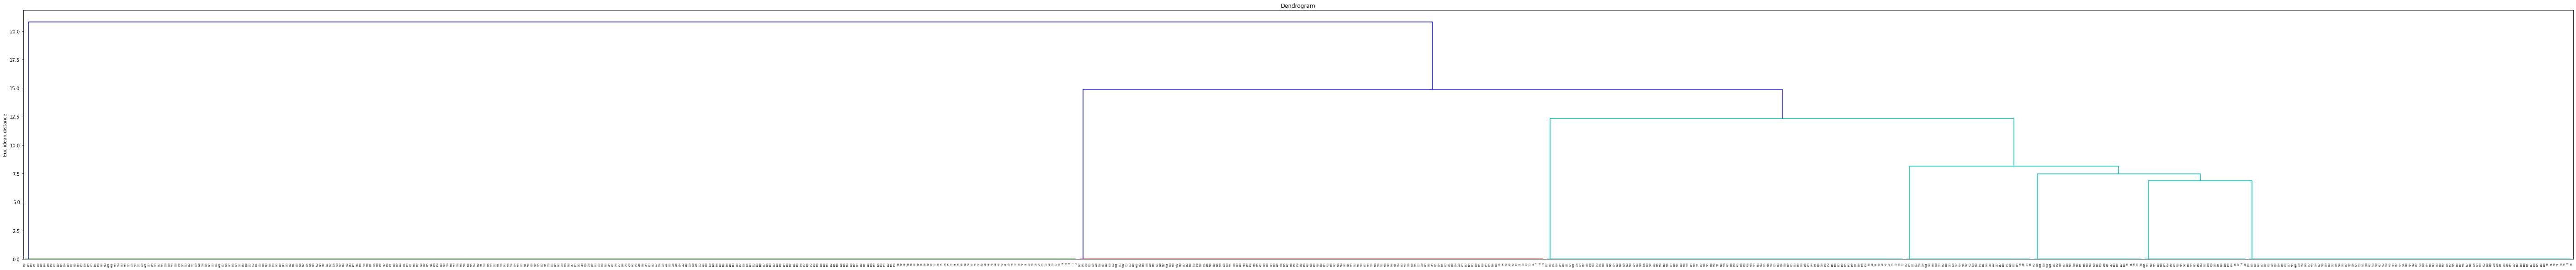

<Figure size 7200x720 with 0 Axes>

In [ ]:
#plotting dendrogram
dendro = dendrogram(Z)
plt.rcParams['figure.figsize'] = (100,10)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()
plt.savefig('thefig.png')

## metrics

In [ ]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

labels = cluster.labels_

In [ ]:
#Silhouette Coefficient
metrics.silhouette_score(df_used_cluster, labels, metric='euclidean')

1.0

In [ ]:
#Calinski-Harabasz
metrics.calinski_harabasz_score(df_used_cluster, labels)

1.0

In [ ]:
#Davies-Bouldin Index
davies_bouldin_score(df_used_cluster, labels)

0.0

# Dendogram


## Test

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

In [ ]:
X = np.array([[0,1,0],
              [0,1,1],
              [0,0,0],
              [1,0,0],
              [0,0,0]])

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)
print(cluster.labels_)

[0 0 1 2 1]


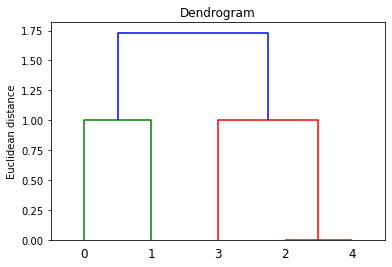

In [ ]:
#Linkage Matrix
Z = linkage(X, method = 'complete')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

## Test 2

In [ ]:
#Importing libraries
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
print(data)
df = data.data
#Selecting certain features based on which clustering is done 
df = df[:,1:3]

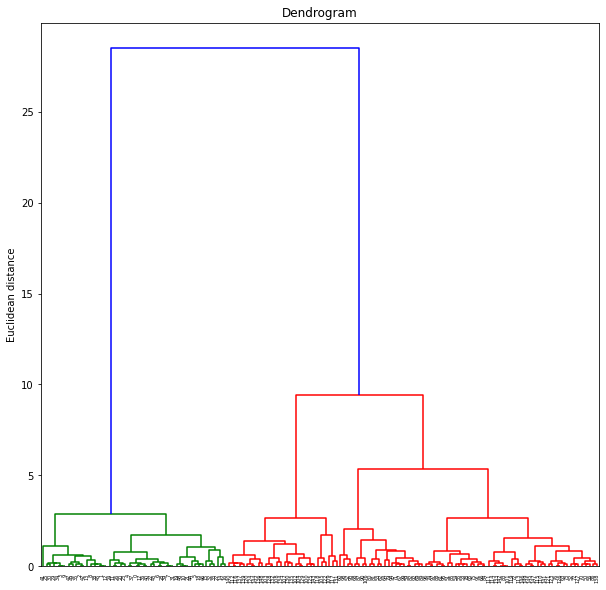

In [ ]:
#Linkage Matrix
Z = linkage(df, method = 'ward')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
#plt.rcParams['figure.figsize'] = (10,10)
plt.show()